# Calculating Population  and Births by Fokontany in 2010 and 2015 using raster data from WorldPop project (Madagascar) + Projection 2025

In [1]:
import datetime
import folium
import string
import pandas as pd
import numpy as np
import pysal
from shapely.geometry import mapping, shape, Polygon, Point
from geopandas import GeoDataFrame, GeoSeries
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
%matplotlib inline

### Load shapefiles

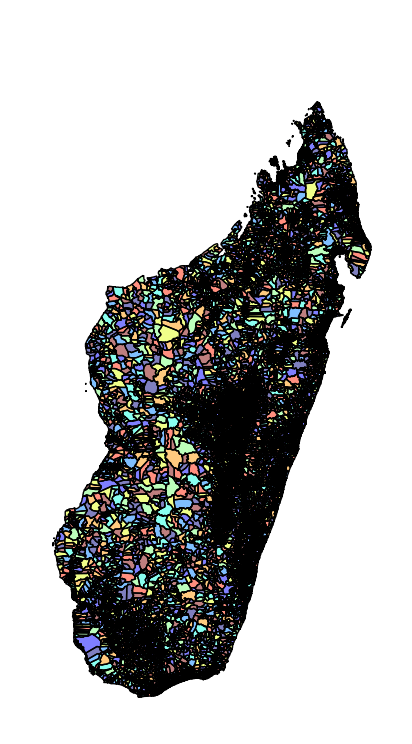

In [2]:
path_to_shapefile = '/media/herimanitra/DONNEES/TBE/OCHA-new/mdg_polbnda_adm4_fokontany_NDMO_OCHA/mdg_polbnda_adm4_fokontany_NDMO_OCHA.shp'
df = GeoDataFrame.from_file(path_to_shapefile)
ax = df.plot(figsize=(9, 9))
ax.set_axis_off()
#for birth:
df_birth = df

### Load rasters:

### Pop

In [3]:
with rasterio.open("/media/herimanitra/DONNEES/TBE/MDG-POP/MDG10adjv4.tif") as src:
    transform = src.meta['transform']
    array2010 = src.read(1)
with rasterio.open("/media/herimanitra/DONNEES/TBE/MDG-POP/MDG15adjv4.tif") as src:
    transform = src.meta['transform']
    array2015 = src.read(1)

### Births

In [4]:
with rasterio.open("/media/herimanitra/DONNEES/TBE/MDG-BTH/MDG2010adjustedBirths.tif") as src:
    transform = src.meta['transform']
    birth2010 = src.read(1)
with rasterio.open("/media/herimanitra/DONNEES/TBE/MDG-BTH/MDG2015adjustedBirths.tif") as src:
    transform = src.meta['transform']
    birth2015 = src.read(1)
with rasterio.open("/media/herimanitra/DONNEES/TBE/MDG-BTH/MDG2025adjustedBirths.tif") as src:
    transform = src.meta['transform']
    birth2025 = src.read(1)

## Aggregate pixels by Fokontany and join in the big dataframe

## Pop

In [5]:
mystats=zonal_stats(df, array2010,transform=transform)
df = df.join(pd.DataFrame(mystats))
df.rename(columns={'count':'count2010','mean': 'mean2010','max':'max2010','min':'min2010'},inplace=True)
mystats=zonal_stats(df, array2015,transform=transform)
df = df.join(pd.DataFrame(mystats))
df.rename(columns={'count':'count2015','mean': 'mean2015','max':'max2015','min':'min2015'},inplace=True)
df.head()

/usr/local/lib/python2.7/dist-packages/rasterstats/io.py:291: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


,COMMUNE,COM_PCODE,C_CODE,DISTRICT,DIST_PCODE,D_CODE,FOKONTANY,F_CODE,P_CODE,REGION,...,SOURCE,geometry,count2010,max2010,mean2010,min2010,count2015,max2015,mean2015,min2015
0,Andina,MDG22203090,203090,Ambositra,MDG22203,203,Ampasina,008,MDG22203090008,Amoron I Mania,...,"BNGRC (National Disaster Management Office), A...",POLYGON ((47.10539999900004 -20.51447000299993...,1184,0.563551,0.395426,0.141508,1184,0.631109,0.442829,0.158472
1,Andina,MDG22203090,203090,Ambositra,MDG22203,203,Antanifotsy,011,MDG22203090011,Amoron I Mania,...,"BNGRC (National Disaster Management Office), A...",POLYGON ((47.13579999900008 -20.54133000299993...,1476,0.871648,0.524013,0.141508,1476,0.976141,0.586832,0.158472
2,Andiolava,MDG24216192,216192,Ihosy,MDG24216,216,Amboloando,006,MDG24216192006,Ihorombe,...,"BNGRC (National Disaster Management Office), A...",POLYGON ((45.58350000000007 -22.53003000199993...,18166,0.111246,0.094668,0.075661,18166,0.124582,0.106016,0.084731
3,Andiolava,MDG24216192,216192,Ihosy,MDG24216,216,Vatambe Nanarena,002,MDG24216192002,Ihorombe,...,"BNGRC (National Disaster Management Office), A...",POLYGON ((45.51825491900007 -22.27432636799995...,17528,0.111246,0.084828,0.075661,17528,0.124582,0.094997,0.084731
4,Andiolava,MDG24216192,216192,Ihosy,MDG24216,216,Vohimary,003,MDG24216192003,Ihorombe,...,"BNGRC (National Disaster Management Office), A...",POLYGON ((45.62246417200004 -22.40084337499991...,7802,0.111246,0.097111,0.075661,7802,0.124582,0.108753,0.084731


## Births:

In [6]:
mystats=zonal_stats(df, birth2010,transform=transform)
df_birth = df_birth.join(pd.DataFrame(mystats))
df_birth.rename(columns={'count':'count2010','mean': 'mean2010','max':'max2010','min':'min2010'},inplace=True)
mystats=zonal_stats(df_birth, birth2015,transform=transform)
df_birth = df_birth.join(pd.DataFrame(mystats))
df_birth.rename(columns={'count':'count2015','mean': 'mean2015','max':'max2015','min':'min2015'},inplace=True)
mystats=zonal_stats(df_birth, birth2025,transform=transform)
df_birth = df_birth.join(pd.DataFrame(mystats))
df_birth.rename(columns={'count':'count2025','mean': 'mean2025','max':'max2025','min':'min2025'},inplace=True)

## and now, our counts....

In [7]:
x=np.array(df['count2010']*df['mean2010'])
mymean= np.round(x[x >0.].sum())
print "we were about", str(mymean), " in 2010"

we were about 19933006.0  in 2010


In [8]:
x=np.array(df['count2015']*df['mean2015'])
mymean= np.round(x[x >0.].sum())
print "we were about", str(mymean), " in 2015"

we were about 22932895.0  in 2015


## Population of Ambatolampy (example)

## Calculate Pop. growth rate and projection see GPW-v4-doc

## Grow Rate and Proj  in Madagascar 2025:

In [16]:
df['pop2010']=df['count2010']*df['mean2010']
df['pop2015']=df['count2015']*df['mean2015']
df['growth_rate']=np.log(df['pop2015']/df['pop2010'])/(2015.-2010.)
df['pop2025']= df['pop2015']*np.exp(df['growth_rate']*(2025-2015))
x=np.array( df['pop2025'])
mymean= np.round(x[x >0.].sum())
print "we will about",mymean, " in 2025"

we were about 30653742.0  in 2025


## Growwth Rate in Ambatolampy

In [16]:
Ambato=df[(df.COMMUNE=='Ambatolampy') & (df.DISTRICT=='Ambatolampy')]
Ambato['pop2010']=Ambato['count2010']*Ambato['mean2010']
Ambato['pop2015']=Ambato['count2015']*Ambato['mean2015']
Ambato['growth_rate']=np.log(Ambato['pop2015']/Ambato['pop2010'])/(2015.-2010.)
Ambato['pop2025']= Ambato['pop2015']*np.exp(Ambato['growth_rate']*(2025-2015))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [17]:
Ambato_birth=df_birth[(df_birth.COMMUNE=='Ambatolampy') & (df_birth.DISTRICT=='Ambatolampy')]
Ambato_birth['pop2010']=Ambato_birth['count2010']*Ambato_birth['mean2010']
Ambato_birth['pop2015']=Ambato_birth['count2015']*Ambato_birth['mean2015']
Ambato_birth['pop2025']=Ambato_birth['count2025']*Ambato_birth['mean2025']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

### save the data:

In [18]:
myvars=['COMMUNE','FOKONTANY','pop2010','pop2015','pop2025']
Ambato[myvars].to_csv("/media/herimanitra/DONNEES/Projet PUDI_PUDE/data/AmbatolampyProjection.csv")

In [19]:
myvars=['COMMUNE','FOKONTANY','pop2010','pop2015','pop2025']
Ambato_birth[myvars].to_csv("/media/herimanitra/DONNEES/Projet PUDI_PUDE/data/AmbatolampyProjectionBirths.csv")

## Source:

* http://www.worldpop.org.uk/data/ for rasters
    
* http://humdata.org and BNGRC for shapefiles